# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Load-Processed-Dataset" data-toc-modified-id="Load-Processed-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Processed Dataset</a></div><div class="lev1 toc-item"><a href="#Word2Vec" data-toc-modified-id="Word2Vec-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Word2Vec</a></div><div class="lev2 toc-item"><a href="#Model" data-toc-modified-id="Model-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model</a></div><div class="lev2 toc-item"><a href="#TNSE-Clustering" data-toc-modified-id="TNSE-Clustering-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>TNSE Clustering</a></div><div class="lev1 toc-item"><a href="#Sense2Vec" data-toc-modified-id="Sense2Vec-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sense2Vec</a></div><div class="lev2 toc-item"><a href="#POS-Tagging" data-toc-modified-id="POS-Tagging-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>POS Tagging</a></div><div class="lev1 toc-item"><a href="#Model-Creation" data-toc-modified-id="Model-Creation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Creation</a></div>

# Load Processed Dataset

In [2]:
import pandas as pd

#Pickle store/load function

def storePickle(df=None,name="temp.pkl"):
    df.to_pickle(name)
    
def loadPickle(name="temp.pkl"):
    df=pd.read_pickle(name)
    return df

In [5]:
fname="processedDataset_2.6_0.2.pkl"
dataset=loadPickle(fname)
dataset.head(1)

,asin,reviewText,reviewerID,overall,reviewTextProcessed
23413899,B005S9ELM6,"Finally a movie with substance, inspired by tr...",A21SKPT0EKDL91,5.0,"[finally, movie, with, substance, inspired, by..."


Here we load the processed dataset stored at the end of previous Notebook.

# Word2Vec

## Model

In [6]:
import gensim
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
%time model = gensim.models.Word2Vec(list(dataset['reviewTextProcessed']), min_count=10, size=100, workers=10)

CPU times: user 11min 45s, sys: 7.45 s, total: 11min 53s
Wall time: 1min 57s


Creating the word2vec model fitting the processed reviews from the datatset.

In [10]:
print (model.most_similar(['prince','woman'],negative=['man']))

[('queen', 0.7964582443237305), ('bride', 0.6967164278030396), ('maid', 0.6841230392456055), ('elizabeth', 0.682813823223114), ('carrie', 0.6766988039016724), ('dorothy', 0.67242032289505), ('sarah', 0.6718154549598694), ('lizzie', 0.6712263822555542), ('mary', 0.6698146462440491), ('rose', 0.6658268570899963)]


Here we find the most similar words in our corpus, based on the query.

## TNSE Clustering

In [11]:
from sklearn.manifold import TSNE
X = model[model.wv.vocab]
tsne = TSNE(n_components=2,random_state=0)
X_tsne = tsne.fit_transform(X)

Here we fit our clustering model with the vectors produced by the gensim library.

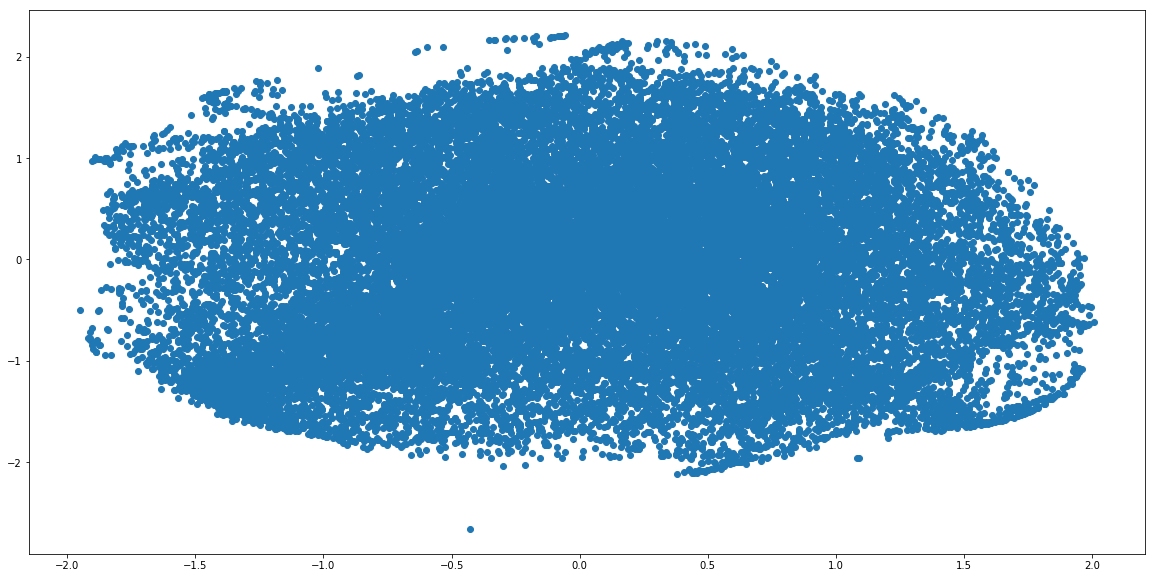

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
#for label, x, y in zip(X, X_tsne[:, 0], X_tsne[:, 1]):
#        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.show()

The cluster formed are visualized here with 2 dimensions of embedded space.

In [13]:
import numpy as np
#Storing model
#model.save('word2vec_model')
#np.save('X_tsne.npy', X_tsne)

#Loading model
#model = gensim.models.Word2Vec.load('word2vec_model')
#X_tsne = np.load('X_tsne.npy')

We can store the word2vec model and fitted cluster model to our disk, for future.

# Sense2Vec

## POS Tagging

In [14]:
import nltk

def pos_tag(reviews):
        pos = [nltk.pos_tag(review) for review in reviews]
        pos = [[(word+"|"+postag) for (word, postag) in review] for review in pos]
        return pos

In [15]:
posTagged=pos_tag(reviews=list(dataset['reviewTextProcessed']))
dataset=dataset.drop('reviewTextProcessed', 1)
dataset['reviewTextProcessed']=posTagged
del posTagged
dataset.head(10)

,asin,reviewText,reviewerID,overall,reviewTextProcessed
23413899,B005S9ELM6,"Finally a movie with substance, inspired by tr...",A21SKPT0EKDL91,5.0,"[finally|RB, movie|NN, with|IN, substance|NN, ..."
23751757,B00003CX8I,This movie really did justice to the X-Men Story.,A22CA02SQ6TKOT,4.0,"[this|DT, movie|NN, really|RB, did|VBD, justic..."
35988261,B005335K9A,This movie has a very necessary message for ou...,A2M7C1M77RPZ46,5.0,"[this|DT, movie|NN, has|VBZ, very|RB, necessar..."
30633911,0800137884,"In this horribly unessesary gory,graphic and v...",A2DHXZKAHH5YRA,1.0,"[in|IN, this|DT, horribly|RB, unessesary|JJ, g..."
58032046,B003ESP636,I saw this on BET so it was edited & I had to ...,A3LK30QCUB3WYR,4.0,"[saw|NN, this|DT, on|IN, bet|NN, so|IN, it|PRP..."
43501515,B00G4Q3KOC,From the opening scene to the bitter sweet end...,A2YDNRDSHM5JXV,5.0,"[from|IN, the|DT, opening|NN, scene|NN, to|TO,..."
62626867,B0018CWEXK,Gotta love Grey's! Keeping up with the lives ...,A3SWVP2H6Z7J9X,5.0,"[gotta|NN, love|VB, grey|NN, keeping|VBG, up|R..."
67159641,0788822713,This is my children's favourite Winnie Pooh st...,A7PG93Z7APTR4,4.0,"[this|DT, is|VBZ, my|PRP$, children|NNS, favou..."
43140149,B001OQCV6A,This movie started very slow but just as I was...,A2XSATF23LD2WB,4.0,"[this|DT, movie|NN, started|VBD, very|RB, slow..."
31316346,B0013Z5B0A,Laura Linney and Philip Seymour Hoffman are th...,A2EMAK4F6VXCLB,4.0,"[laura|NN, linney|NN, and|CC, philip|VB, seymo..."


Here we ran a process to fetch POS tags of all the word tokens present in the reviews. Having such semantic information about the words, would help us extract the contextual information or sentiment polarity of the review.
<br/>As seen above, the column "reviewTextProcessed" stores all the processed words with its POS tags.

In [16]:
storePickle(dataset,name="taggedDataset.pkl")
print("Stored!")

Stored!


The tagged reviews are stored here in our disk, for future use.

# Model Creation

In [18]:
dataset=loadPickle("taggedDataset.pkl")
dataset.head(1)

,asin,reviewText,reviewerID,overall,reviewTextProcessed
23413899,B005S9ELM6,"Finally a movie with substance, inspired by tr...",A21SKPT0EKDL91,5.0,"[finally|RB, movie|NN, with|IN, substance|NN, ..."


In [ ]:
import gensim
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#%time model = gensim.models.Word2Vec(list(dataset['reviewTextProcessed']), min_count=10, size=100, workers=10)

In [22]:
print (model.most_similar(['mystery|NN']))

KeyError: "word 'mystery|NN' not in vocabulary"

In [ ]:
from sklearn.manifold import TSNE
X = model[model.wv.vocab]

In [ ]:
tsne = TSNE(n_components=2,random_state=0)
X_tsne = tsne.fit_transform(X)
X_tsne

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
#for label, x, y in zip(X, X_tsne[:, 0], X_tsne[:, 1]):
#        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.show()